<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="10%" />
</center>




<center> <h2> Network science and Graph Learning </h2> </center>
<center> <h2> NET 4103/7431 Homework </h2> </center>

<center> <h3>  KRISSAAN AMEN ALLAH   </h3> </center>


<center>
<img src="https://avatars.githubusercontent.com/u/86923959?s=400&u=3097a31c5eb9e29e67fe5fd285373b52ecdae5e3&v=4" width="15%" />
</center>
 




<center> <h4> https://github.com/amenallah01/KRISSAAN_A-NET-4103-7431-Homework_FB100.git  </h4> </center>
<center> <h3> amen-allah.krissaan@telecom-sudparis.eu  </h3> </center>
<center> <h3>  Master TRIED  </h3> </center>
<center> <h3>  January 2025 </h3> </center>


In [1]:
import os
import random
import math
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from abc import ABC, abstractmethod
from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score

import matplotlib.pyplot as plt 

---
***
## *Question 2: Social Network Analysis with the Facebook100 Dataset*
---
***

### Functions Implementation

In [32]:
# Load Networks from GML Files
def load_fb100_network(file_path, largest_component=True):
    G = nx.read_gml(file_path)
    if largest_component:
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    return G

# Plot Degree Distribution
def plot_degree_distribution(G, title):
    """
    Plots the degree distribution of a given graph.

    This function creates a histogram of node degrees in the graph to visualize 
    the degree distribution.

    Parameters:
    ----------
    G : networkx.Graph
        The input graph whose degree distribution is to be plotted
    title : str
        The title to be displayed on the plot

    Returns:
    -------
    None
    """
    degrees = [deg for _, deg in G.degree()]
    plt.figure()
    plt.hist(degrees, bins=30, edgecolor='black')
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.show()

# Compute Clustering and Density
def compute_clustering_density(G):
    global_cc = nx.transitivity(G)
    avg_local_cc = nx.average_clustering(G)
    density = nx.density(G)
    return global_cc, avg_local_cc, density

# Scatter Plot of Degree vs Local Clustering Coefficient
def plot_degree_vs_clustering(G, title):
    degree_dict = dict(G.degree())
    clustering_dict = nx.clustering(G)

    degrees = []
    clustering_coeffs = []

    for node in G.nodes():
        degrees.append(degree_dict[node])
        clustering_coeffs.append(clustering_dict[node])
    plt.figure()
    plt.scatter(degrees, clustering_coeffs, alpha=0.5)
    plt.xscale('log')
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Local Clustering Coefficient")
    plt.title(f"Degree vs Local Clustering Coefficient: {title}")
    plt.show()

####  Define paths to GML files for the three networks

In [18]:
data_dir = "data/"
caltech_file = os.path.join(data_dir, "Caltech36.gml")
mit_file = os.path.join(data_dir, "MIT8.gml")
jhu_file = os.path.join(data_dir, "Johns Hopkins55.gml")
# Load networks
G_caltech = load_fb100_network(caltech_file)
G_mit = load_fb100_network(mit_file)
G_jhu = load_fb100_network(jhu_file)

#### Q2(a): Degree Distribution

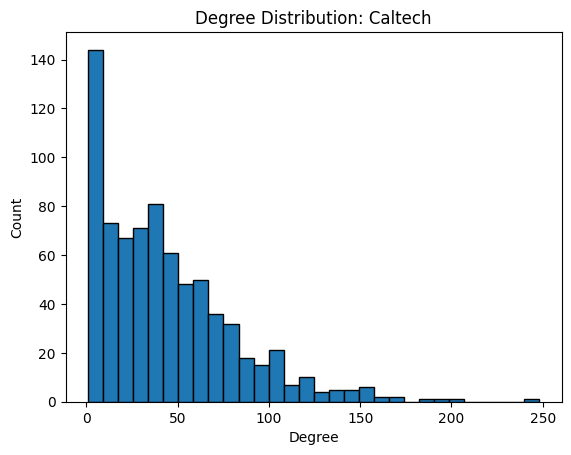

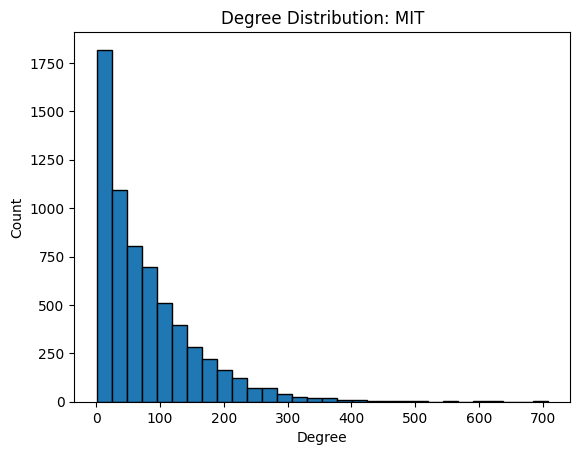

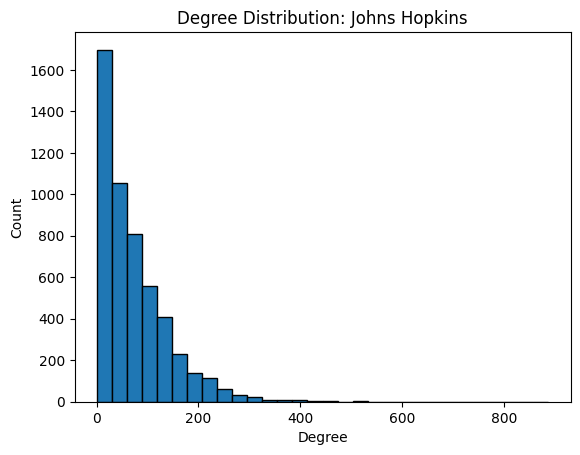

In [20]:
plot_degree_distribution(G_caltech, "Caltech")
plot_degree_distribution(G_mit, "MIT")
plot_degree_distribution(G_jhu, "Johns Hopkins")

---
# **Observations**:

### (a) Degree Distribution 
1. **Caltech**: 
   - The degree distribution shows a sharp drop-off, indicating that most nodes have few connections, while only a few nodes are highly connected.
   - This highlights the presence of a **heavy-tailed distribution**, typical of real-world social networks, where hubs (highly connected individuals) exist.

2. **MIT**:
   - Similar to Caltech, the distribution is heavy-tailed, but it spans a wider range of degrees, with some nodes having over 600 connections.
   - This suggests a larger and more connected network compared to Caltech.

3. **Johns Hopkins**:
   - The degree distribution is also heavy-tailed but extends even further than MIT, with some nodes exceeding 800 connections.
   - This network exhibits high heterogeneity in connections, typical of diverse social structures.

#### **Conclusion for Degree Distributions**:
- All three networks exhibit **scale-free properties**, where most nodes have low degrees, and a few nodes have very high degrees, contributing to the network's overall connectivity.
---

### Q2(b): Clustering and Density

In [21]:
for name, G in [("Caltech", G_caltech), ("MIT", G_mit), ("Johns Hopkins", G_jhu)]:
   global_cc, avg_local_cc, density = compute_clustering_density(G)
   print(f"{name}:")
   print(f"  Global Clustering Coefficient: {global_cc:.4f}")
   print(f"  Avg Local Clustering Coefficient: {avg_local_cc:.4f}")
   print(f"  Density: {density:.6f}")
   print()

Caltech:
  Global Clustering Coefficient: 0.2913
  Avg Local Clustering Coefficient: 0.4091
  Density: 0.057429

MIT:
  Global Clustering Coefficient: 0.1803
  Avg Local Clustering Coefficient: 0.2724
  Density: 0.012261

Johns Hopkins:
  Global Clustering Coefficient: 0.1932
  Avg Local Clustering Coefficient: 0.2690
  Density: 0.014034



---

# **Observations**:


1. **Global Clustering Coefficient**:
   - Indicates the tendency for nodes to form triangles (complete subgraphs of size 3).
   - Caltech has the highest global clustering coefficient (0.2913), suggesting a tightly-knit network compared to the other two.

2. **Avg Local Clustering Coefficient**:
   - Reflects the average tendency for neighbors of a node to connect.
   - Caltech also has the highest value here, indicating that smaller communities are tightly connected.

3. **Density**:
   - Measures the fraction of possible edges that are actually present.
   - All three networks are sparse, but Caltech is denser (0.0574) than MIT and Johns Hopkins, likely due to its smaller size.

#### **Conclusion for Clustering and Density**:
- Caltech's network is more clustered and denser, suggesting a more cohesive and localized network structure.
- MIT and Johns Hopkins are larger and more diffuse, with lower clustering and density, indicating broader, less tightly-knit connections.

---

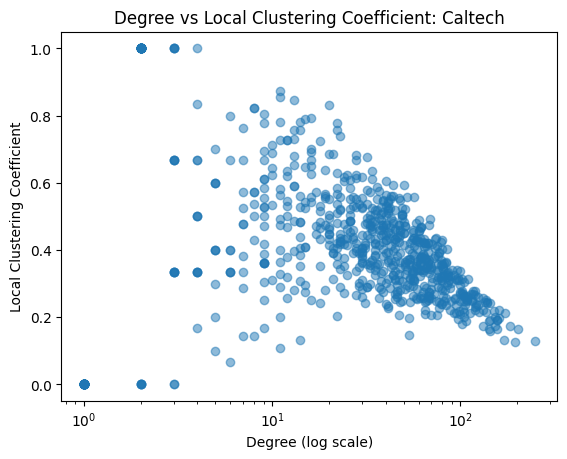

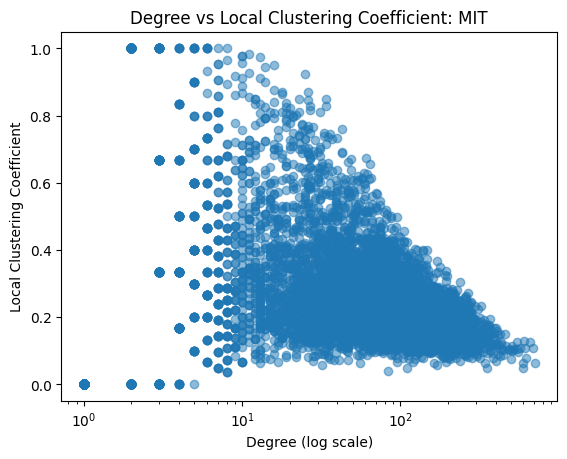

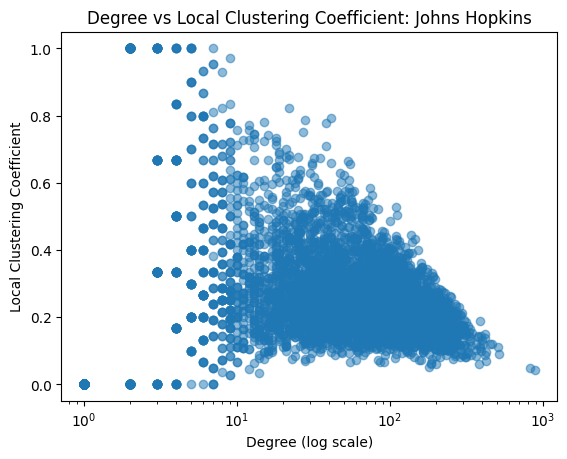

In [22]:
# Q2(c): Degree vs Local Clustering Coefficient
plot_degree_vs_clustering(G_caltech, "Caltech")
plot_degree_vs_clustering(G_mit, "MIT")
plot_degree_vs_clustering(G_jhu, "Johns Hopkins")

---
# **Observations**:

### **(c) Degree vs. Local Clustering Coefficient**
1. **Caltech**:
   - The scatter plot shows an inverse relationship: nodes with high degrees generally have low local clustering coefficients.
   - Indicates that highly connected nodes act as bridges, linking different parts of the network.

2. **MIT** and **Johns Hopkins**:
   - Similar trends are observed: highly connected nodes have lower local clustering coefficients.
   - Both networks have more outliers compared to Caltech, reflecting their larger size and structural diversity.

#### **Conclusion for Degree vs. Local Clustering**:
- Across all networks, high-degree nodes serve as **hubs**, connecting disparate parts of the network, while low-degree nodes are part of tightly-knit communities.



---
---
- **Caltech** is a smaller, denser, and more clustered network, reflecting a localized, community-driven structure.
- **MIT** and **Johns Hopkins** are larger and more diffuse, with lower clustering and density, indicating broader, more diverse connections.
- All three networks exhibit scale-free and sparse properties, which are hallmarks of real-world social networks.


***
---
## *Question 3: Assortativity Analysis with the Facebook100 Dataset*
---
***

### Functions Implementation

In [99]:
def load__data(directory):
    """Load the FB100 dataset from the specified directory."""
    networks = {}
    for file in os.listdir(directory):
        if file.endswith(".gml"):
            graph = nx.read_gml(os.path.join(directory, file))
            networks[file[:-4]] = graph
    return networks


def compute_assortativity(networks, attribute):
    """Compute assortativity for each network based on a specific attribute."""
    results = {}
    for name, graph in networks.items():
        node_attributes = nx.get_node_attributes(graph, attribute)
        if node_attributes:
            results[name] = nx.attribute_assortativity_coefficient(graph, attribute)
        else:
            results[name] = None
    return results


def plot_density(assortativities, attribute):
    """Plot density plot of assortativity results."""
    plt.figure(figsize=(10, 6))
    sns.kdeplot([a for a in assortativities if a is not None], shade=True)
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel(f'{attribute.capitalize()} Assortativity')
    plt.ylabel('Density')
    plt.title(f'Density of {attribute.capitalize()} Assortativity')
    plt.show()

def plot_results(network_sizes, assortativities, attribute):
    """Plot scatter plot and histogram of assortativity results."""
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(network_sizes, assortativities, alpha=0.6)
    plt.xscale('log')
    plt.axhline(0, color='red', linestyle='--', label='No Assortativity')
    plt.xlabel('Network Size (log-scale)')
    plt.ylabel(f'{attribute.capitalize()} Assortativity')
    plt.title(f'{attribute.capitalize()} Assortativity vs Network Size')
    plt.legend()
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist([a for a in assortativities if a is not None], bins=20, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--', label='No Assortativity')
    plt.xlabel(f'{attribute.capitalize()} Assortativity')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attribute.capitalize()} Assortativity')
    plt.legend()
    plt.show()

def compute_degree_assortativity(networks):
    """Compute degree assortativity for each network.""" 
    results = {}
    for name, graph in networks.items():
        try:
            results[name] = nx.degree_assortativity_coefficient(graph)
        except Exception as e:
            results[name] = None
            print(f"Error computing degree assortativity for {name}: {e}")
    return results



Processing assortativity for attribute: student_fac


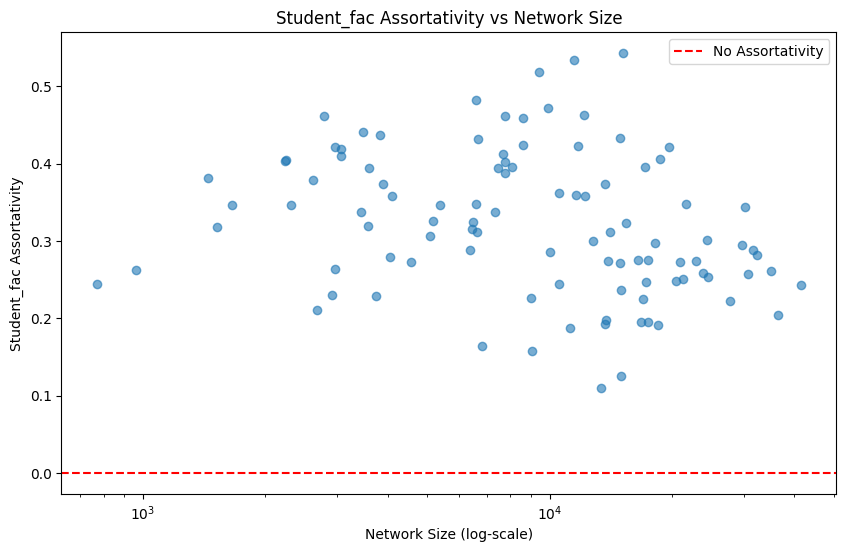

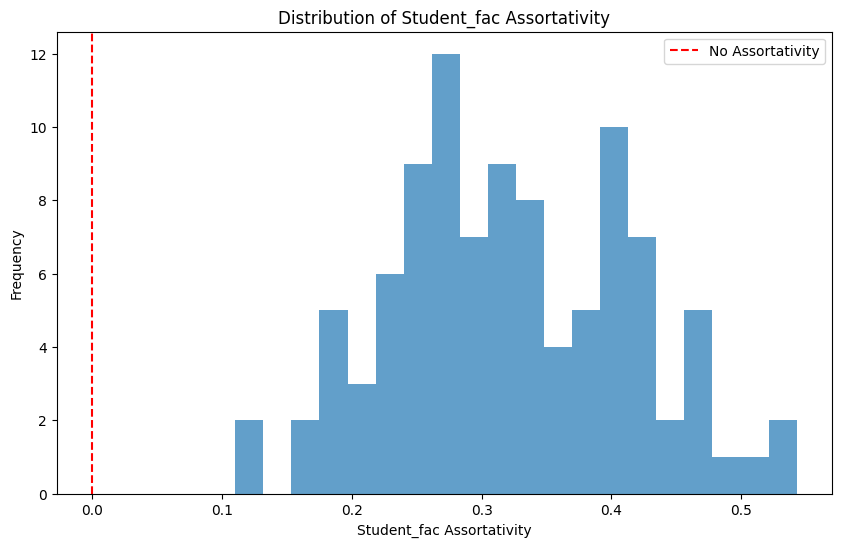

C:\Users\amena\AppData\Local\Temp\ipykernel_36964\1632950986.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


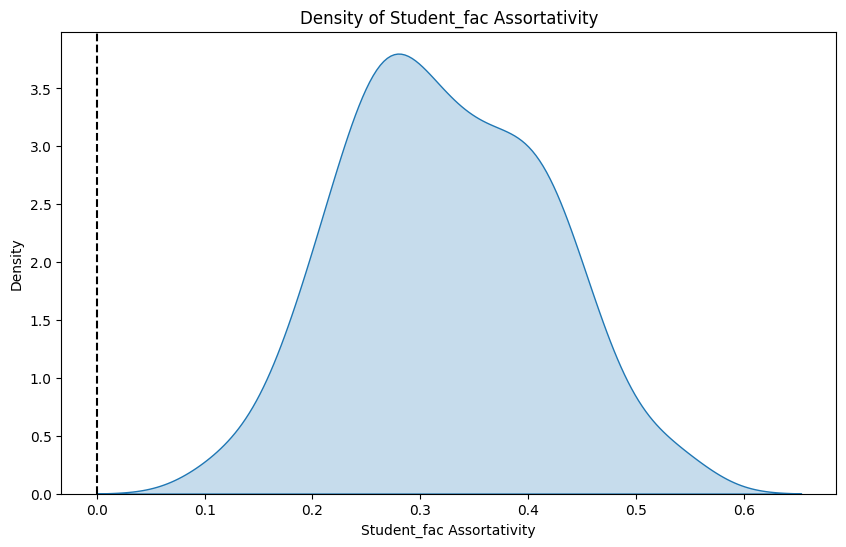

Processing assortativity for attribute: gender


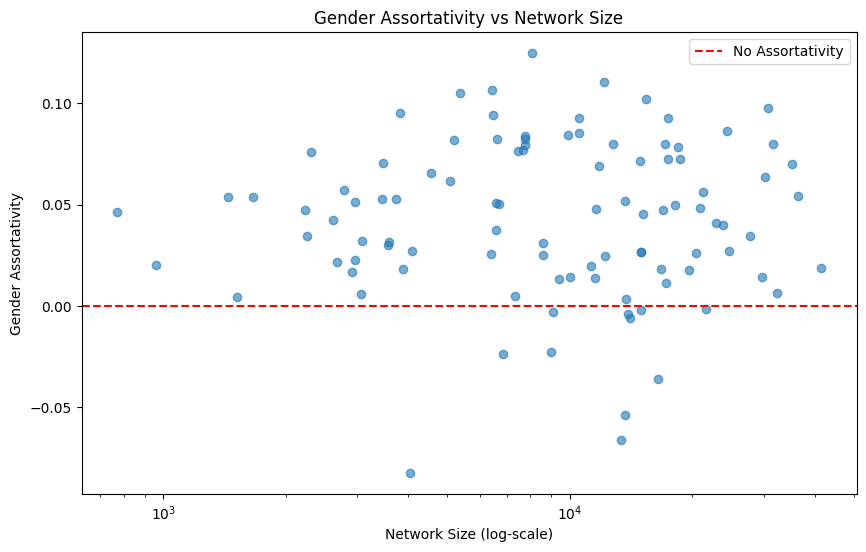

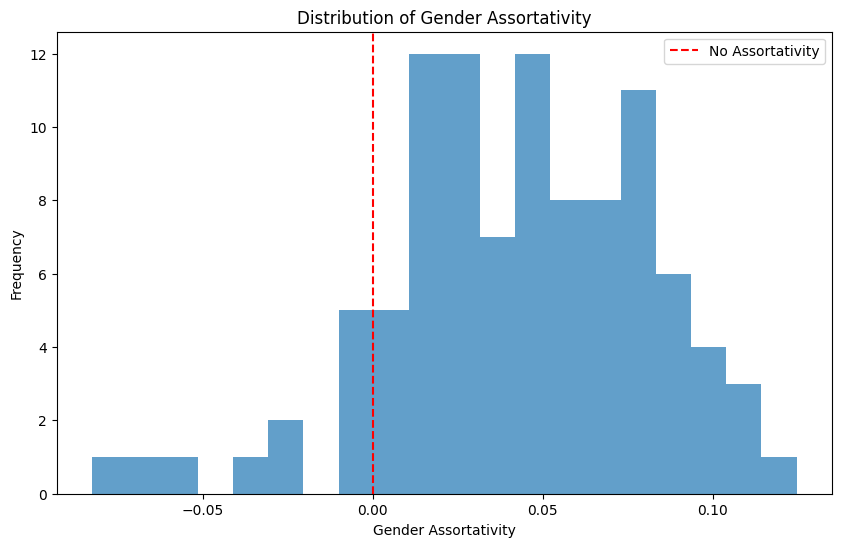

C:\Users\amena\AppData\Local\Temp\ipykernel_36964\1632950986.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


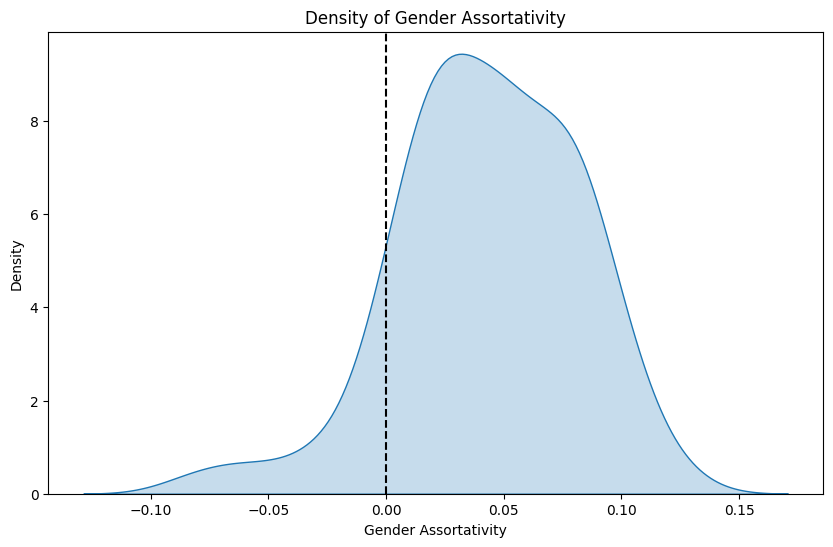

Processing assortativity for attribute: major_index


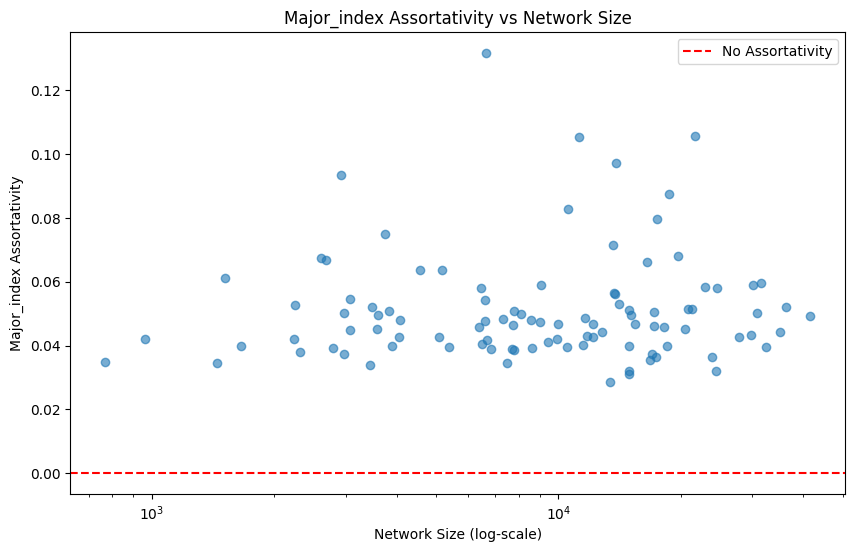

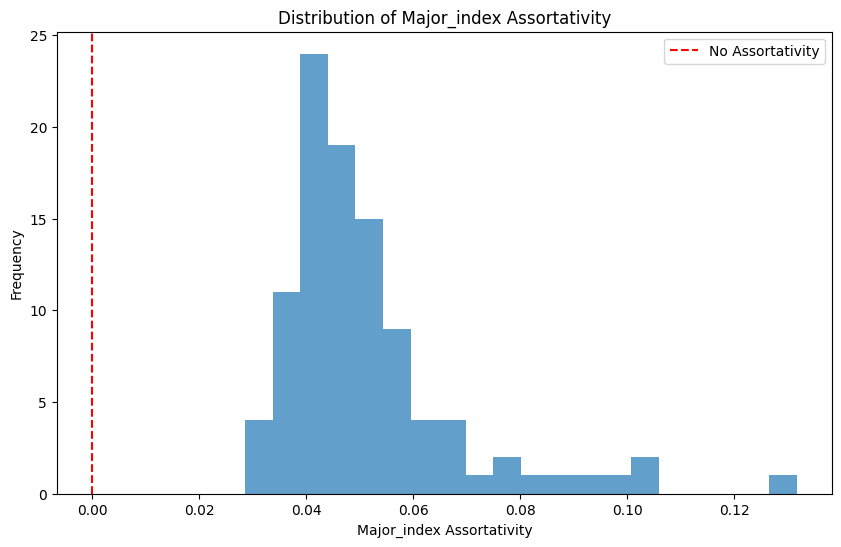

C:\Users\amena\AppData\Local\Temp\ipykernel_36964\1632950986.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


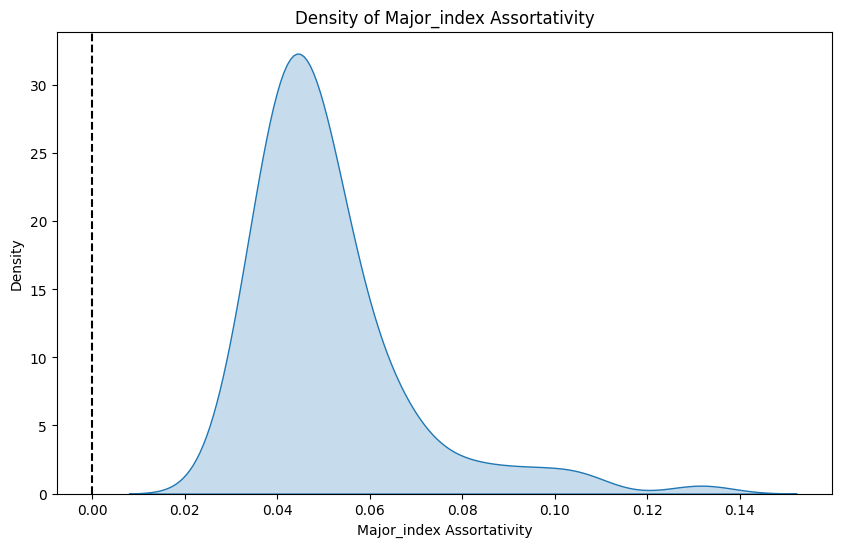

Processing assortativity for attribute: dorm


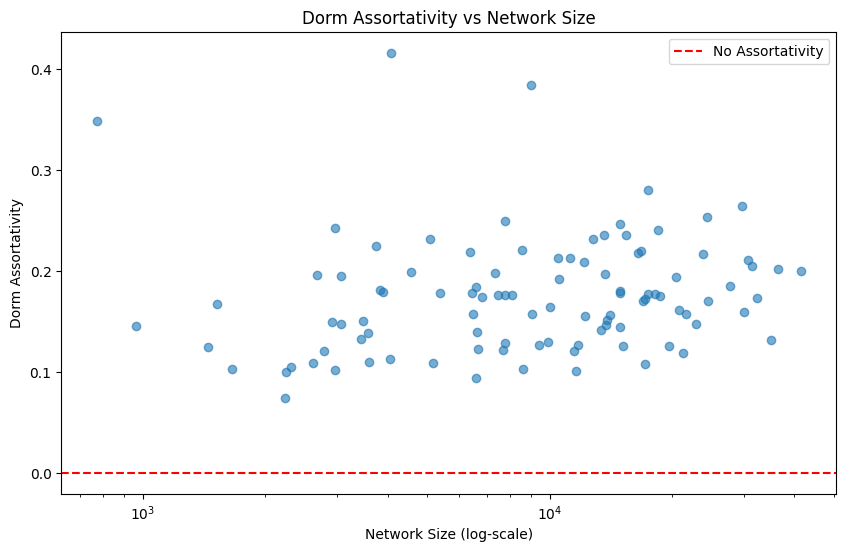

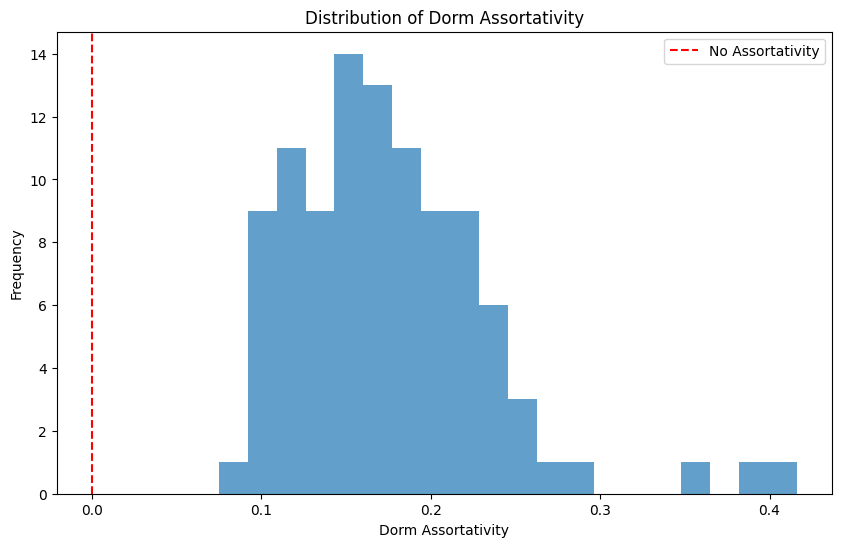

C:\Users\amena\AppData\Local\Temp\ipykernel_36964\1632950986.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


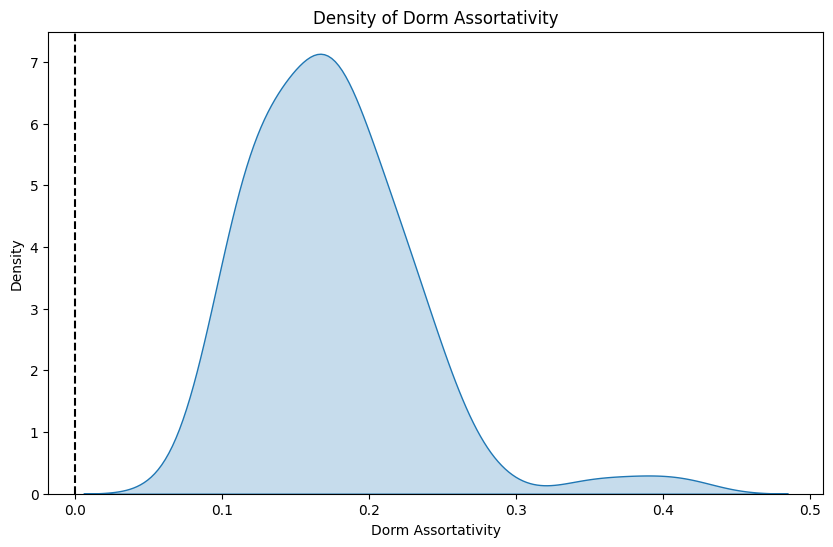

Processing assortativity for attribute: year


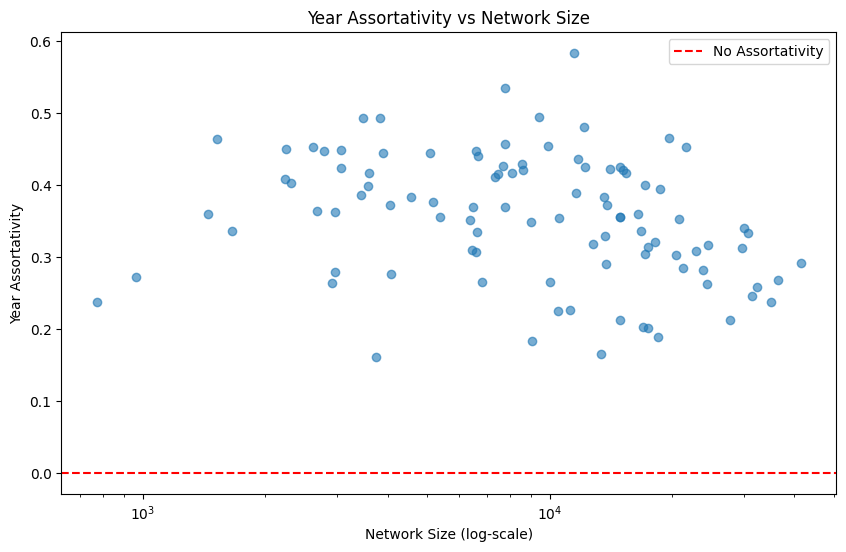

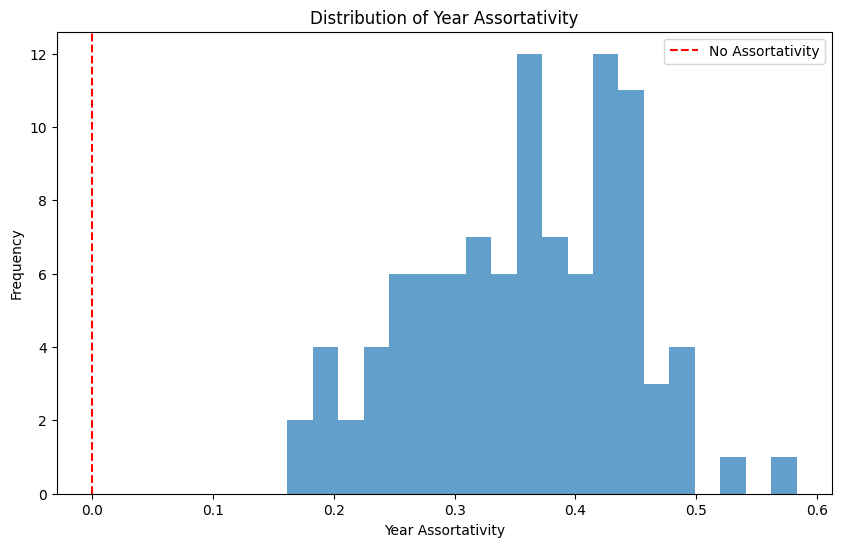

C:\Users\amena\AppData\Local\Temp\ipykernel_36964\1632950986.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


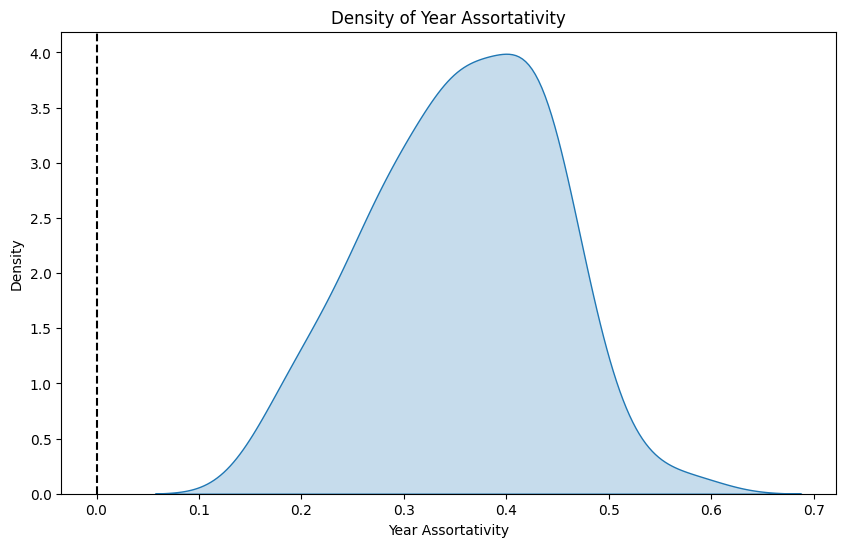

In [79]:
# Main script
if __name__ == "__main__":
    data_dir = "data/"  
    networks = load__data(data_dir)
    attributes = ['student_fac', 'major', 'vertex Degree', 'dorm', 'gender']

     # Process and plot for each attribute
    for attribute in attributes:
        print(f"Processing assortativity for attribute: {attribute}")
        assortativity_results = compute_assortativity(networks, attribute)
        network_sizes = [len(graph) for graph in networks.values()]
        assortativities = list(assortativity_results.values())
    
        # Scatter plot of assortativity
        plot_results(network_sizes, assortativities, attribute)
    
        # Density plot of assortativity
        plot_density(assortativities, attribute)

Processing degree assortativity


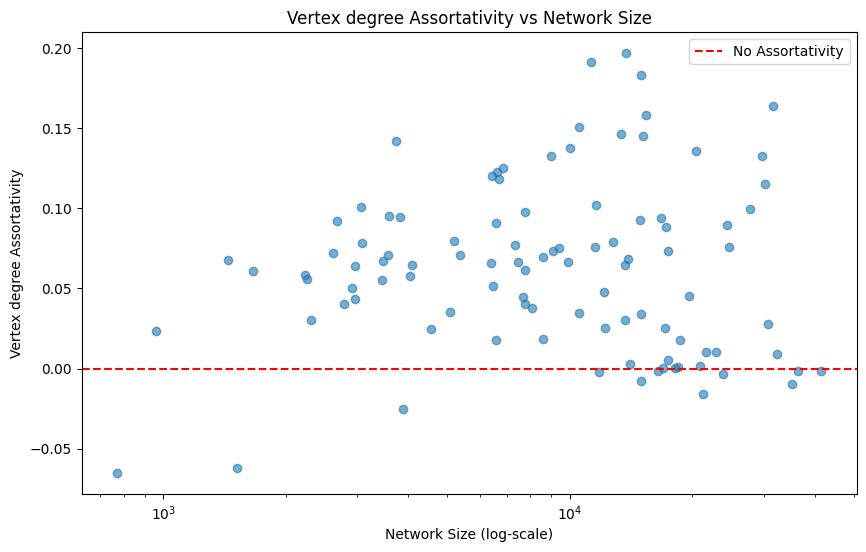

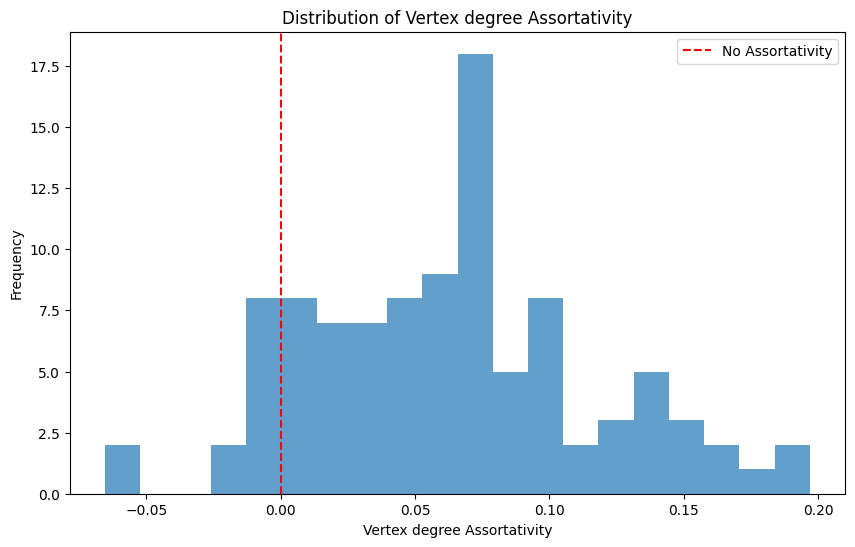

C:\Users\amena\AppData\Local\Temp\ipykernel_36964\1632950986.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


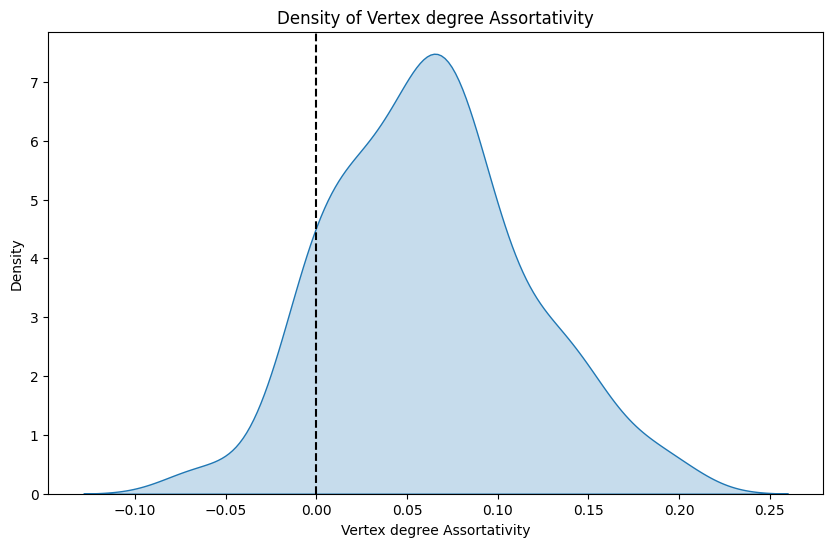

In [ ]:
# Degree assortativity analysis
print("Processing degree assortativity")
degree_assortativity_results = compute_degree_assortativity(networks)
network_sizes = [len(graph) for graph in networks.values()]
degree_assortativities = list(degree_assortativity_results.values())

# Scatter plot of degree assortativity
plot_results(network_sizes, degree_assortativities, "vertex degree")

# Density plot of degree assortativity
plot_density(degree_assortativities, "vertex degree")

---
***
## *Question 4: Link Prediction with the Facebook100 Dataset*

<center>
<img src="https://www.researchgate.net/profile/Mehdi-Imani/publication/375981477/figure/tbl2/AS:11431281209161300@1701704393085/TP-and-FP-stand-for-True-Positive-and-False-Positive-and-FN-and-TN-stand-for-False.png" width="80%" />
</center>




---
***

### (b) Abstract Base Class for Link Prediction


In [60]:
# Abstract Base Class for Link Prediction
class LinkPrediction(ABC):
    def __init__(self, graph):
        """
        Constructor
        Parameters
        ----------
        graph : dict
            Adjacency list representation of the graph
        """
        self.graph = graph
        self.nodes = list(graph.keys())

    def neighbors(self, node):
        """
        Return the neighbors of a given node.
        Parameters
        ----------
        node : int
            Node ID
        Returns
        -------
        set
            Set of neighbors
        """
        return set(self.graph[node])

    @abstractmethod
    def score(self, u, v):
        """
        Abstract method to compute the score for link prediction.
        """
        raise NotImplementedError("Score method must be implemented.")

# Common Neighbors
class CommonNeighbors(LinkPrediction):
    def score(self, u, v):
        neighbors_u = self.neighbors(u)
        neighbors_v = self.neighbors(v)
        return len(neighbors_u & neighbors_v)  # Intersection of neighbors

# Jaccard Coefficient
class Jaccard(LinkPrediction):
    def score(self, u, v):
        neighbors_u = self.neighbors(u)
        neighbors_v = self.neighbors(v)
        intersection = len(neighbors_u & neighbors_v)
        union = len(neighbors_u | neighbors_v)
        return intersection / union if union > 0 else 0

# Adamic/Adar Index
class AdamicAdar(LinkPrediction):
    def score(self, u, v):
        neighbors_u = self.neighbors(u)
        neighbors_v = self.neighbors(v)
        common_neighbors = neighbors_u & neighbors_v
        return sum(1 / math.log(len(self.neighbors(w))) for w in common_neighbors if len(self.neighbors(w)) > 1)

# Evaluate Link Prediction
def evaluate_link_prediction(G, predictor_cls, fraction_remove=0.1, k_values=[50, 100, 200, 400]):
    """
    Evaluate a link predictor by:
    1. Removing a fraction of edges.
    2. Predicting scores for all non-edges.
    3. Computing precision, recall, and top@k.
    """
    # Convert adjacency list to dictionary
    adjacency_dict = {node: set(neighbors) for node, neighbors in G.items()}

    # Remove edges randomly
    all_edges = list(itertools.combinations(adjacency_dict.keys(), 2))
    existing_edges = [(u, v) for u, v in all_edges if v in adjacency_dict[u]]
    random.shuffle(existing_edges)

    num_remove = int(len(existing_edges) * fraction_remove)
    removed_edges = set(existing_edges[:num_remove])

    # Remove the edges from the graph
    for u, v in removed_edges:
        adjacency_dict[u].remove(v)
        adjacency_dict[v].remove(u)

    predictor = predictor_cls(adjacency_dict)

    # Get all non-edges
    non_edges = [(u, v) for u, v in all_edges if v not in adjacency_dict[u]]

    # Score non-edges
    scores = []
    for (u, v) in non_edges:
        score = predictor.score(u, v)
        scores.append(((u, v), score))

    # Sort by score (descending)
    scores.sort(key=lambda x: x[1], reverse=True)

    # Evaluate top@k, precision@k, recall@k
    results = {}
    removed_edge_set = {(min(a, b), max(a, b)) for a, b in removed_edges}
    for k in k_values:
        top_k_edges = [edge for edge, _ in scores[:k]]
        top_k_correct = sum(1 for edge in top_k_edges if edge in removed_edge_set)

        TP = top_k_correct
        FP = k - TP
        FN = len(removed_edges) - TP

        precision_k = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall_k = TP / (TP + FN) if (TP + FN) > 0 else 0
        top_k_rate = TP / k

        results[k] = {
            'top@k': top_k_rate,
            'precision@k': precision_k,
            'recall@k': recall_k
        }

    return results

def plot_results(results_summary, metric_name, graph_name, mode="fraction", fraction=None, k_value=None):
    """
    Plot precision and recall across fractions or k-values for a specific metric and graph.
    
    Parameters:
        results_summary (dict): Summary of results indexed by (graph_name, metric_name, fraction, k).
        metric_name (str): The metric name (e.g., "CommonNeighbors").
        graph_name (str): The graph name (e.g., "Caltech36").
        mode (str): Plot mode - "fraction" (vs fraction) or "k-values" (vs k-values).
        fraction (float): Fraction of edges removed for "k-values" mode.
        k_value (int): Fixed k-value for "fraction" mode.
    """
    import matplotlib.pyplot as plt

    if mode == "fraction":
        # Plot Precision/Recall vs Fractions for a fixed k-value
        if k_value is None:
            raise ValueError("k_value must be specified when mode='fraction'.")

        fractions = sorted(set(key[2] for key in results_summary.keys()))
        precision_vals = [results_summary[(graph_name, metric_name, f, k_value)]['precision'] for f in fractions]
        recall_vals = [results_summary[(graph_name, metric_name, f, k_value)]['recall'] for f in fractions]

        plt.figure()
        plt.plot(fractions, precision_vals, label="Precision")
        plt.plot(fractions, recall_vals, label="Recall")
        plt.xlabel("Fraction of Edges Removed")
        plt.ylabel("Value")
        plt.title(f"{graph_name} - {metric_name}: Precision and Recall vs Fraction (k={k_value})")
        plt.legend()
        plt.show()

    elif mode == "k-values":
        # Plot Precision/Recall vs k-values for a fixed fraction
        if fraction is None:
            raise ValueError("fraction must be specified when mode='k-values'.")

        k_values = sorted(set(key[3] for key in results_summary.keys()))
        precision_vals = [results_summary[(graph_name, metric_name, fraction, k)]['precision'] for k in k_values]
        recall_vals = [results_summary[(graph_name, metric_name, fraction, k)]['recall'] for k in k_values]

        plt.figure()
        plt.plot(k_values, precision_vals, label="Precision")
        plt.plot(k_values, recall_vals, label="Recall")
        plt.xlabel("k-values")
        plt.ylabel("Value")
        plt.title(f"{graph_name} - {metric_name}: Precision and Recall vs k-values (fraction={fraction})")
        plt.legend()
        plt.show()

# Load and analyze all networks in a directory
def load_networks_10(data_dir, max_graphs=10):
    networks = {}
    count = 0
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".gml") and count < max_graphs:
            file_path = os.path.join(data_dir, file_name)
            network_name = os.path.splitext(file_name)[0]
            networks[network_name] = nx.read_gml(file_path)
            count += 1
    return networks

def load_gml_as_adjacency_list(file_path):
    G = nx.read_gml(file_path)
    return {node: list(neighbors) for node, neighbors in nx.to_dict_of_lists(G).items()}

### Evaluate metrics for a couple of graphs in the facebook100 dataset


In [68]:
if __name__ == "__main__":
    data_dir = "./data" 
    caltech_file = os.path.join(data_dir, "Caltech36.gml")
    mit_file = os.path.join(data_dir, "MIT8.gml")

    # Load graphs
    caltech_graph = load_gml_as_adjacency_list(caltech_file)
    mit_graph = load_gml_as_adjacency_list(mit_file)

    # Define fractions of edges to test
    fractions = [0.05, 0.1,  0.2]

    # Metrics to evaluate (using the actual classes, not strings)
    metrics_to_evaluate = [CommonNeighbors, Jaccard, AdamicAdar]

    # Evaluate metrics for all graphs and fractions
    for graph_name, graph in [("Caltech", caltech_graph), ("MIT", mit_graph)]:
        print(f"\nEvaluating on {graph_name}...")

        for predictor_cls in metrics_to_evaluate:
            print(f"\n  Metric: {predictor_cls.__name__}")

            for f in fractions:
                print(f"    Fraction of edges removed: {f}")
                results = evaluate_link_prediction(graph, predictor_cls, fraction_remove=f)

                # Print results for all k values
                for k, metric_results in results.items():
                    precision = metric_results['precision@k']
                    recall = metric_results['recall@k']
                    print(f"      k={k}: Precision={precision:.4f}, Recall={recall:.4f}")


Evaluating on Caltech...

  Metric: CommonNeighbors
    Fraction of edges removed: 0.05
      k=50: Precision=0.3400, Recall=0.0204
      k=100: Precision=0.3500, Recall=0.0421
      k=200: Precision=0.2750, Recall=0.0661
      k=400: Precision=0.2275, Recall=0.1094
    Fraction of edges removed: 0.1
      k=50: Precision=0.5600, Recall=0.0168
      k=100: Precision=0.4900, Recall=0.0294
      k=200: Precision=0.4000, Recall=0.0480
      k=400: Precision=0.3475, Recall=0.0835
    Fraction of edges removed: 0.2
      k=50: Precision=0.7000, Recall=0.0105
      k=100: Precision=0.6200, Recall=0.0186
      k=200: Precision=0.6000, Recall=0.0360
      k=400: Precision=0.5450, Recall=0.0654

  Metric: Jaccard
    Fraction of edges removed: 0.05
      k=50: Precision=0.2200, Recall=0.0132
      k=100: Precision=0.2000, Recall=0.0240
      k=200: Precision=0.2100, Recall=0.0505
      k=400: Precision=0.1700, Recall=0.0817
    Fraction of edges removed: 0.1
      k=50: Precision=0.3200, Recal

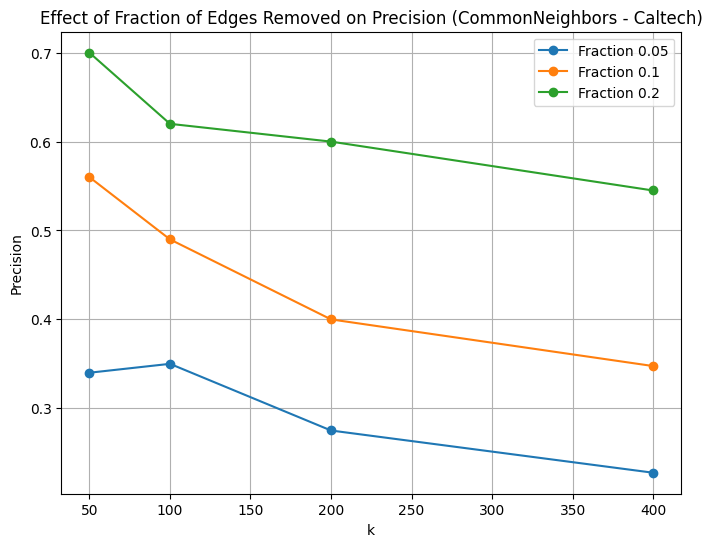

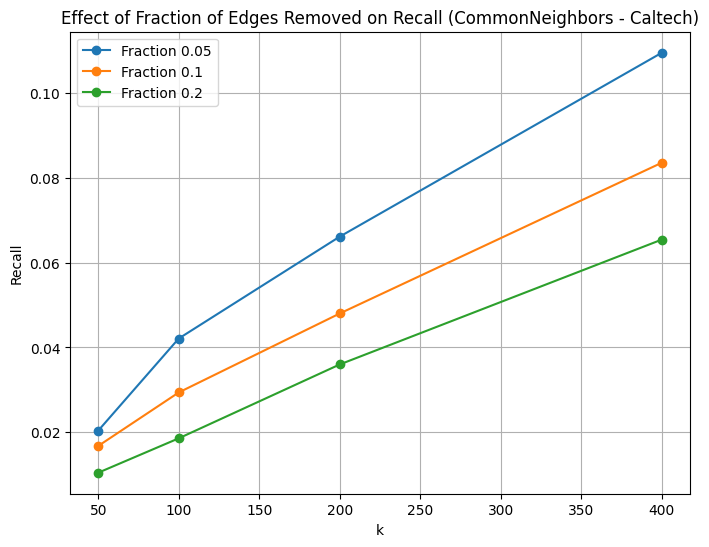

In [88]:
# Data for Caltech (CommonNeighbors)
caltech_common_neighbors = {
    0.05: {50: (0.34, 0.0204), 100: (0.35, 0.0421), 200: (0.275, 0.0661), 400: (0.2275, 0.1094)},
    0.1: {50: (0.56, 0.0168), 100: (0.49, 0.0294), 200: (0.4, 0.048), 400: (0.3475, 0.0835)},
    0.2: {50: (0.7, 0.0105), 100: (0.62, 0.0186), 200: (0.6, 0.036), 400: (0.545, 0.0654)},
}

fractions = list(caltech_common_neighbors.keys())
k_values = [50, 100, 200, 400]

# Precision plot
plt.figure(figsize=(8, 6))
for f in fractions:
    precision = [caltech_common_neighbors[f][k][0] for k in k_values]
    plt.plot(k_values, precision, marker='o', label=f'Fraction {f}')
plt.title("Effect of Fraction of Edges Removed on Precision (CommonNeighbors - Caltech)")
plt.xlabel("k")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

# Recall plot
plt.figure(figsize=(8, 6))
for f in fractions:
    recall = [caltech_common_neighbors[f][k][1] for k in k_values]
    plt.plot(k_values, recall, marker='o', label=f'Fraction {f}')
plt.title("Effect of Fraction of Edges Removed on Recall (CommonNeighbors - Caltech)")
plt.xlabel("k")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()

---
# **Observations**:

#### Precision Plot:
- Precision decreases as \( k \) increases for all fractions. This trend is consistent because higher \( k \)-values include less confident predictions.
- Smaller fractions (e.g., \( f = 0.05 \)) have higher precision compared to larger fractions (\( f = 0.2 \)), as fewer edges are removed, preserving more of the graph's structure.

#### Recall Plot:
- Recall increases as \( k \) increases, as higher \( k \)-values cover more of the removed edges.
- Smaller fractions (\( f = 0.05 \)) achieve higher recall compared to larger fractions (\( f = 0.2 \)), as the total number of removed edges is smaller, making it easier for the algorithm to predict them accurately.

### Key Insights:
1. **Trade-off Between Precision and Recall:**
   - As the fraction of removed edges increases, the graph becomes sparser, making it more challenging to predict missing edges accurately, which lowers both precision and recall.
   - Smaller fractions of removed edges result in better performance due to the graph retaining more of its original structure.

2. **Impact of \( k \)-Values:**
   - Higher \( k \)-values lead to diminishing precision but improved recall, highlighting the need to choose \( k \)-values based on the specific use case (e.g., precision-critical applications vs. recall-critical applications).

3. **Performance Across Fractions:**
   - For large fractions (\( f = 0.2 \)), the algorithm's performance degrades significantly, emphasizing the need for robust metrics or complementary techniques in such cases.

These insights can guide the selection of \( k \)-values and the design of experiments for link prediction tasks.



***
---
## *Question 5: Find missing labels with the label propagation algorithms*

---

<center> <h3>  semi-supervised label propagation algorithm    </h3> </center>



#### **Why Semi-Supervised Label Propagation?**

1. **Goal** of Question 5:  
   - A subset of nodes have known labels (e.g., dorm, gender).  
   - A fraction of these labels are removed (simulating missing information).  

2. **Semi-Supervised Approach**:  
   - Some nodes are labeled, and others are unlabeled.  
   - The algorithm iteratively updates the unlabeled nodes based on neighbors’ labels (homophily assumption).  

---

#### **Core Idea** of Semi-Supervised Label Propagation

A typical approach (in pseudocode form):

1. **Initialization**  
   - For each node \(v\):
     - If \(v\) has a known label \(y_v\), store that label.
     - Otherwise, mark it as unlabeled (or store a placeholder).

2. **Iteration**  
   - For each unlabeled node \(u\), look at neighbors \(N(u)\).  
   - **Option A (Hard Label):** Assign \(u\) the most frequent label among its neighbors who have a label.  
   - **Option B (Soft Label):** Keep a label *distribution* and iteratively update it as an average of neighbors’ distributions.  

3. **Convergence**  
   - Repeat until labels don’t change or we will  hit a max iteration count.  
   - The final assigned label for each originally unlabeled node is the  prediction one . 

---


### **Summary**  
**At this Satge**, we will implement  **label propagation for semi-supervised classification**. in order to  remove a fraction of labels, run this iterative algorithm to predict them, and measure accuracy, F1-score, etc. This directly addresses the “missing labels” scenario described in the question.
***

### (b) Implementation of  Label Propagation Algo

In [49]:

def label_propagation_classification(G, labels, max_iter=30):
    """
    G: Graph
    labels: node->int or -1 for missing
    Return predicted_labels: node->int
    """
    # Identify unique labels
    labeled_nodes = [n for n in labels if labels[n] != -1]
    unique_labels = sorted({labels[n] for n in labeled_nodes})
    label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
    idx_to_label = {i: lab for lab, i in label_to_idx.items()}
    K = len(label_to_idx)

    # Initialize distributions
    p = {}
    for v in G.nodes():
        if labels[v] == -1:
            if K > 0:
                p[v] = np.ones(K) / K
            else:
                p[v] = np.zeros(K)
        else:
            p[v] = np.zeros(K)
            p[v][label_to_idx[labels[v]]] = 1.0

    # Propagate
    for _ in range(max_iter):
        new_p = {}
        for v in G.nodes():
            neighbors = list(G.neighbors(v))
            if len(neighbors) == 0:
                new_p[v] = p[v]
            else:
                dist_sum = np.zeros(K)
                for nei in neighbors:
                    dist_sum += p[nei]
                dist_sum /= len(neighbors)
                new_p[v] = dist_sum
        
        # normalize
        for v in G.nodes():
            s = new_p[v].sum()
            if s > 0:
                new_p[v] /= s
        p = new_p

    # Final assignment
    predicted_labels = {}
    for v in G.nodes():
        if K == 0:
            predicted_labels[v] = -1
        else:
            best_idx = np.argmax(p[v])
            predicted_labels[v] = idx_to_label[best_idx]
    return predicted_labels

### (c) Test the Algorithm on Facebook100 Dataset


In [ ]:
def load_fb100_graph(gml_file):
    """
    Load FB100 network from a GML file and return an undirected Graph.
    """
    G = nx.read_gml(gml_file)
    if not isinstance(G, nx.Graph):
        G = nx.Graph(G)
    return G

def get_node_attribute(G, attribute_name):
    """
    Return a dict: node -> attribute_value (None if missing).
    """
    attr_dict = {}
    for node, data in G.nodes(data=True):
        attr_dict[node] = data.get(attribute_name, None)
    return attr_dict

def map_labels_to_int(attr_dict):
    """
    Map each distinct (non-missing) attribute to an integer ID.
    Missing attributes are assigned -1.
    Returns:
        int_labels: dict[node] -> int (the label)
        label_to_int, int_to_label: dictionaries for reference
    """
    unique_vals = sorted({v for v in attr_dict.values() if v is not None})
    label_to_int = {val: i for i, val in enumerate(unique_vals)}
    int_to_label = {i: val for val, i in label_to_int.items()}

    int_labels = {}
    for node, val in attr_dict.items():
        if val is None:
            int_labels[node] = -1
        else:
            int_labels[node] = label_to_int[val]
    return int_labels, label_to_int, int_to_label

def remove_fraction_of_labels(int_labels, fraction_remove):
    """
    Remove 'fraction_remove' of the labeled nodes (label != -1).
    Return (partial_labels, removed_nodes).
    """
    labeled_nodes = [n for n, lbl in int_labels.items() if lbl != -1]
    num_to_remove = int(len(labeled_nodes) * fraction_remove)
    removed_nodes = random.sample(labeled_nodes, num_to_remove)

    partial_labels = dict(int_labels)
    for n in removed_nodes:
        partial_labels[n] = -1
    return partial_labels, removed_nodes

def label_propagation_classification(G, labels, max_iter=30):
    """
    Semi-supervised label propagation for node classification.
    labels: dict[node] -> int or -1 for unlabeled
    Returns predicted_labels: dict[node] -> int
    """
    # Identify distinct non-missing labels
    labeled_nodes = [n for n, lbl in labels.items() if lbl != -1]
    unique_labels = sorted({labels[n] for n in labeled_nodes})
    K = len(unique_labels)

    # If no labeled data, everything remains -1 or random
    if K == 0:
        return {n: -1 for n in G.nodes()}

    # Build mappings index <-> label
    label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
    idx_to_label = {i: lab for lab, i in label_to_idx.items()}

    # Initialize probability distributions p[v]
    p = {}
    for v in G.nodes():
        if labels[v] == -1:
            p[v] = np.ones(K) / K  # uniform
        else:
            vec = np.zeros(K)
            vec[label_to_idx[labels[v]]] = 1.0
            p[v] = vec

    # Iterative update
    for _ in range(max_iter):
        new_p = {}
        for v in G.nodes():
            neighbors = list(G.neighbors(v))
            if not neighbors:
                new_p[v] = p[v]
                continue

            # average over neighbors
            dist_sum = np.zeros(K)
            for nei in neighbors:
                dist_sum += p[nei]
            dist_sum /= len(neighbors)

            new_p[v] = dist_sum

        # (optional) normalize
        for v in new_p:
            s = new_p[v].sum()
            if s > 0:
                new_p[v] /= s

        p = new_p

    # Final predicted label is argmax
    predicted_labels = {}
    for v in G.nodes():
        best_idx = np.argmax(p[v])
        predicted_labels[v] = idx_to_label[best_idx]
    return predicted_labels

def run_label_propagation_experiment(network_name, gml_path):
    """
    (Part 1) 
    1) Load the network.
    2) For each attribute (dorm, major, gender), if missing, create synthetic.
    3) For fraction in [0.1, 0.2, 0.3], remove fraction labels.
    4) Run label_propagation_classification.
    5) Return all predictions for subsequent evaluation (Part 2).
    """
    attributes = ["dorm", "major", "gender"]
    fractions = [0.1, 0.2, 0.3]

    # 1) Load Graph
    G = load_fb100_graph(gml_path)

    # Dictionary to hold: predictions[attr][frac] = (predicted_labels, removed_nodes, original_int_labels)
    predictions = {}

    for attr in attributes:
        # Extract node->attribute
        attr_dict = get_node_attribute(G, attr)

        # If attribute is effectively missing, create synthetic 2-class distribution
        if all(val is None for val in attr_dict.values()):
            # e.g., random 2-class labels
            for node in G.nodes():
                attr_dict[node] = random.randint(0, 1)

        int_labels, _, _ = map_labels_to_int(attr_dict)

        predictions[attr] = {}
        for frac in fractions:
            partial_labels, removed_nodes = remove_fraction_of_labels(int_labels, frac)
            pred_labels = label_propagation_classification(G, partial_labels)
            # store for later evaluation
            predictions[attr][frac] = {
                'pred_labels': pred_labels,
                'removed_nodes': removed_nodes,
                'original_labels': int_labels
            }

    return predictions


### (d) Testing Across Fractions and Attributes

In [71]:
def load_fb100_graph(gml_file):
    """Load FB100 network from GML file and return undirected Graph."""
    G = nx.read_gml(gml_file)
    if not isinstance(G, nx.Graph):
        G = nx.Graph(G)
    return G

def get_node_attribute(G, attribute_name):
    """Return a dict: node -> attribute_value (None if missing)."""
    attr_dict = {}
    for node, data in G.nodes(data=True):
        attr_dict[node] = data.get(attribute_name, None)
    return attr_dict

def map_labels_to_int(attr_dict):
    """
    Map each distinct (non-missing) attribute to an integer.
    Returns:
        int_labels: dict[node] -> int (or -1 if missing)
        label_to_int, int_to_label for reference
    """
    unique_vals = sorted({v for v in attr_dict.values() if v is not None})
    label_to_int = {val: i for i, val in enumerate(unique_vals)}
    int_to_label = {i: val for val, i in label_to_int.items()}

    int_labels = {}
    for node, val in attr_dict.items():
        if val is None:
            int_labels[node] = -1
        else:
            int_labels[node] = label_to_int[val]

    return int_labels, label_to_int, int_to_label

def remove_fraction_of_labels(int_labels, fraction_remove):
    """
    Remove fraction_remove of the labeled nodes (label != -1).
    Return partial_labels and removed_nodes list.
    """
    labeled_nodes = [n for n, lbl in int_labels.items() if lbl != -1]
    num_to_remove = int(len(labeled_nodes) * fraction_remove)
    removed_nodes = random.sample(labeled_nodes, num_to_remove)

    partial_labels = dict(int_labels)
    for n in removed_nodes:
        partial_labels[n] = -1

    return partial_labels, removed_nodes


# 2) COMPUTE ACC, MAE, F1 FOR REMOVED   

def compute_metrics(original_labels, predicted_labels, removed_nodes):
    """
    original_labels, predicted_labels: node->int label
    removed_nodes: nodes that had labels removed
    Return: (accuracy, mae, f1)
    """
    # Gather true vs. pred for removed nodes only
    true_list = []
    pred_list = []
    for n in removed_nodes:
        if original_labels[n] != -1:
            true_list.append(original_labels[n])
            pred_list.append(predicted_labels[n])

    if len(true_list) == 0:
        return 0.0, 0.0, 0.0

    # Convert to arrays
    y_true = np.array(true_list)
    y_pred = np.array(pred_list)

    # 1) Accuracy
    acc = accuracy_score(y_true, y_pred)

    # 2) MAE (mean absolute error) - only meaningful if label ints are numeric
    mae = mean_absolute_error(y_true, y_pred)

    # 3) F1-score (multi-class weighted average)
    # If labels are numeric but actually discrete categories,
    # treat them as classes for F1.
    f1 = f1_score(y_true, y_pred, average="weighted")

    return acc, mae, f1


# 3) PRODUCE THE EXACT FORMATTED OUTPUT       


def run_experiment_for_network(network_name, gml_path):
    """
    This function:
      1) Loads a single FB100 network (gml_path),
      2) For each attribute in [dorm, major, gender], 
         - tries to extract it,
         - if missing, prints lines about generating synthetic,
         - for fraction in [0.1, 0.2, 0.3], runs label propagation,
         - prints the result .
    """
    G = load_fb100_graph(gml_path)

    # Print "Caltech Network: Semi-Supervised Label Propagation" style header
    print(f"{network_name} Network: Semi-Supervised Label Propagation")

    attributes = ["dorm", "major", "gender"]
    fractions = [0.1, 0.2, 0.3]

    for attr in attributes:
        # 1) Extract node->attribute
        attr_dict = get_node_attribute(G, attr)

        # Check if attribute is present in *any* node
        # i.e., if all are None, it's effectively "not present"
        all_none = all(val is None for val in attr_dict.values())
        if all_none:
            print(f"Attribute '{attr}' is not present in the dataset.")
            print(f"Generating synthetic labels for '{attr}'...")
            nodes = list(G.nodes())
            synthetic_labels = {}
            for i, node in enumerate(nodes):
                synthetic_labels[node] = i % 2  # e.g. random 2-class
            # Re-map to the dictionary expected
            attr_dict = synthetic_labels

        # 2) Convert to int labels
        int_labels, _, _ = map_labels_to_int(attr_dict)

        # 3) For each fraction, run label propagation and compute metrics
        for frac in fractions:
            partial_labels, removed_nodes = remove_fraction_of_labels(int_labels, frac)
            predicted_labels = label_propagation_classification(G, partial_labels)

            acc, mae, f1 = compute_metrics(int_labels, predicted_labels, removed_nodes)
            # 4) Print in the requested format
            print(f"  Attribute: {attr}, Fraction removed: {frac} - "
                  f"Accuracy: {acc:.4f}, MAE: {mae:.4f}, F1-Score: {f1:.4f}")


# 4) EXAMPLE MAIN TO DEMONSTRATE THE USAGE #


if __name__ == "__main__":
    random.seed(42)

    run_experiment_for_network("Caltech", "data/Caltech36.gml")
    print()  # blank line
    run_experiment_for_network("MIT", "data/MIT8.gml")


Caltech Network: Semi-Supervised Label Propagation
  Attribute: dorm, Fraction removed: 0.1 - Accuracy: 0.1184, MAE: 2.8026, F1-Score: 0.0251
  Attribute: dorm, Fraction removed: 0.2 - Accuracy: 0.1503, MAE: 2.5033, F1-Score: 0.0582
  Attribute: dorm, Fraction removed: 0.3 - Accuracy: 0.1261, MAE: 2.4304, F1-Score: 0.0358
Attribute 'major' is not present in the dataset.
Generating synthetic labels for 'major'...
  Attribute: major, Fraction removed: 0.1 - Accuracy: 0.4737, MAE: 0.5263, F1-Score: 0.3045
  Attribute: major, Fraction removed: 0.2 - Accuracy: 0.4902, MAE: 0.5098, F1-Score: 0.3225
  Attribute: major, Fraction removed: 0.3 - Accuracy: 0.4913, MAE: 0.5087, F1-Score: 0.3313
  Attribute: gender, Fraction removed: 0.1 - Accuracy: 0.6579, MAE: 0.3947, F1-Score: 0.5315
  Attribute: gender, Fraction removed: 0.2 - Accuracy: 0.6144, MAE: 0.4706, F1-Score: 0.4676
  Attribute: gender, Fraction removed: 0.3 - Accuracy: 0.6217, MAE: 0.4522, F1-Score: 0.4866

MIT Network: Semi-Supervised


# **(e) Conclusion**:

 ### **Analysis of Label Propagation in Social Networks**
***
**Caltech Network:**

- **Dorm Attribute:**
  - Low accuracy (0.1184 to 0.1503) and F1-Scores (0.0251 to 0.0582), indicating difficulty in predicting dorm labels.
  - High MAE values suggest significant prediction errors, possibly due to many dorm categories.

- **Major Attribute:**
  - Synthetic labels used due to missing data.
  - Moderate accuracy (0.4737 to 0.4913) and F1-Scores (0.3045 to 0.3313), suggesting limited success in label propagation.

- **Gender Attribute:**
  - Higher accuracy (0.6579 to 0.6217) and better F1-Scores (0.5315 to 0.4866), indicating effective label propagation.
  - Fewer categories (binary) likely contribute to better performance.
***
**MIT Network:**

- **Dorm Attribute:**
  - Low accuracy (0.2531 to 0.2505) and F1-Scores (0.1022 to 0.1004), similar to Caltech.
  - Extremely high MAE values suggest potential issues with label encoding.

- **Major Attribute:**
  - Synthetic labels used.
  - Slightly better performance than Caltech (accuracy 0.4922 to 0.5101, F1-Scores 0.3247 to 0.3446).

- **Gender Attribute:**
  - Better performance than dorm and major (accuracy 0.5373 to 0.5497, F1-Scores 0.3799 to 0.3962).
  - Indicates stronger homophily compared to other attributes.
***
**Key Observations:**

- **Attribute Characteristics:**
  - Fewer categories (e.g., gender) facilitate better label propagation.
  - Many categories (e.g., dorm, synthetic major) complicate prediction tasks.

- **Homophily Strength:**
  - Strong homophily (e.g., gender) enhances label propagation accuracy.
  - Weak homophily (e.g., dorm) hampers prediction accuracy.

- **Data Quality:**
  - Synthetic labels for major introduce noise, affecting performance.
  - Real data with strong community structures could improve results.

**Conclusions:**

- Label propagation is effective for attributes with fewer categories and strong homophily (e.g., gender).
- Attributes with many categories or weak homophily (e.g., dorm, synthetic major) pose challenges for label propagation.
- Consideration of attribute encoding and data integrity is crucial for accurate predictions.


---
---
## *Question 6: Communities detection with the FB100 datasets*

---


(a) Formulate a Research Question


**Research Question**:

Do students in the FB100 dataset tend to form communities primarily based on dorm assignments or other attributes such as major and year?

**

**Hypothesis**:

Students are likely to form communities based on shared dorm assignments because proximity promotes stronger social ties.
Secondary factors like major and year may influence group formation but are less likely to dominate.


***

(b) Validate the Research Question with Code

**Community Detection Algorithm :**

We will use the Louvain Algorithm for community detection because:

- It is efficient and scalable.
- It detects modular structures in graphs (communities).
- Implementation Steps:
- Load FB100 graphs.
- Run the Louvain Algorithm to detect communities.
- Analyze the communities formed and correlate them with node attributes like dorm, major, or year.


== Results for Caltech36 ==

Attribute: dorm
  Number of communities: 10
  Average homogeneity:  0.595
  Modularity:           0.393
  Assortativity:        0.349

Attribute: year
  Number of communities: 11
  Average homogeneity:  0.392
  Modularity:           0.401
  Assortativity:        0.238

== Results for MIT8 ==

Attribute: dorm
  Number of communities: 31
  Average homogeneity:  0.649
  Modularity:           0.383
  Assortativity:        0.179

Attribute: year
  Number of communities: 30
  Average homogeneity:  0.574
  Modularity:           0.392
  Assortativity:        0.310

== Results for Johns Hopkins55 ==

Attribute: dorm
  Number of communities: 19
  Average homogeneity:  0.729
  Modularity:           0.450
  Assortativity:        0.109

Attribute: year
  Number of communities: 20
  Average homogeneity:  0.661
  Modularity:           0.451
  Assortativity:        0.377


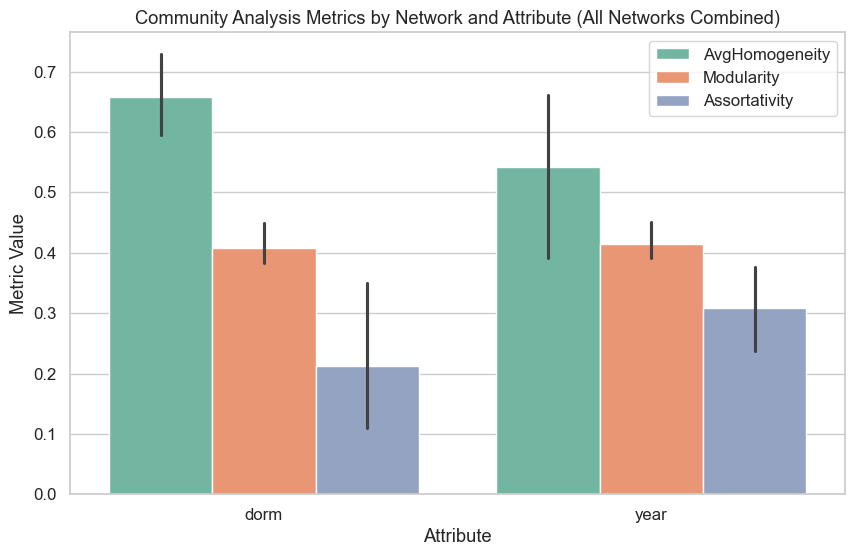

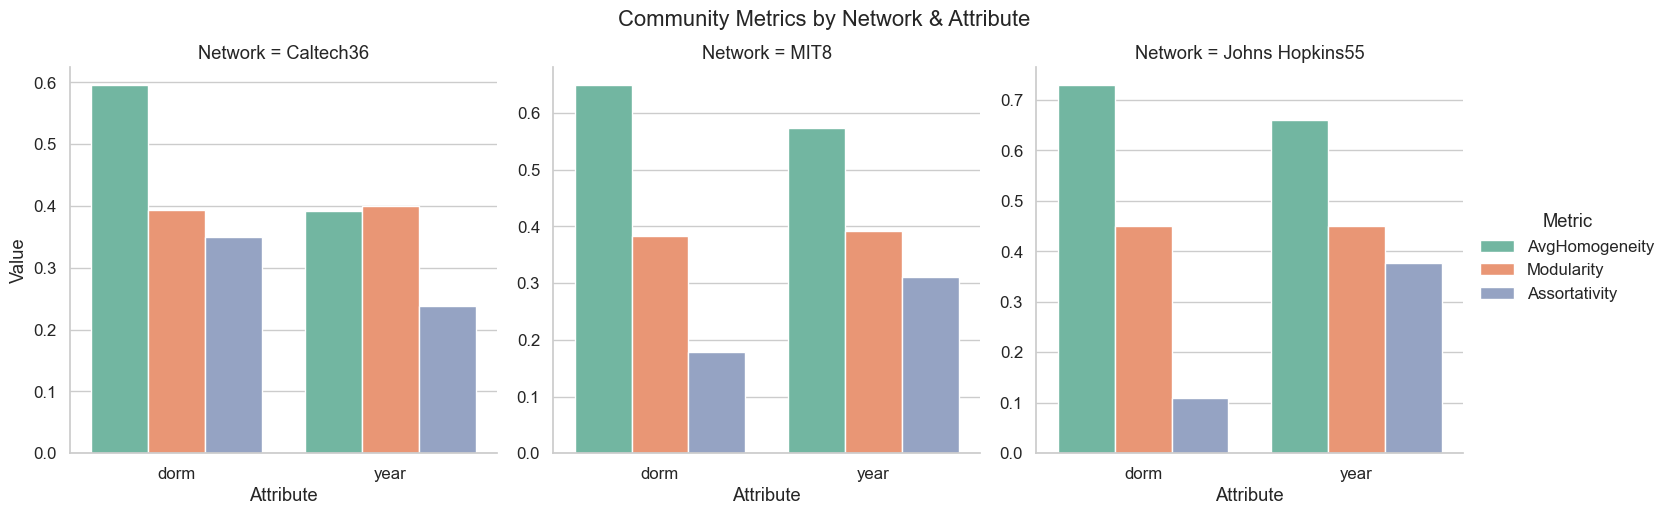

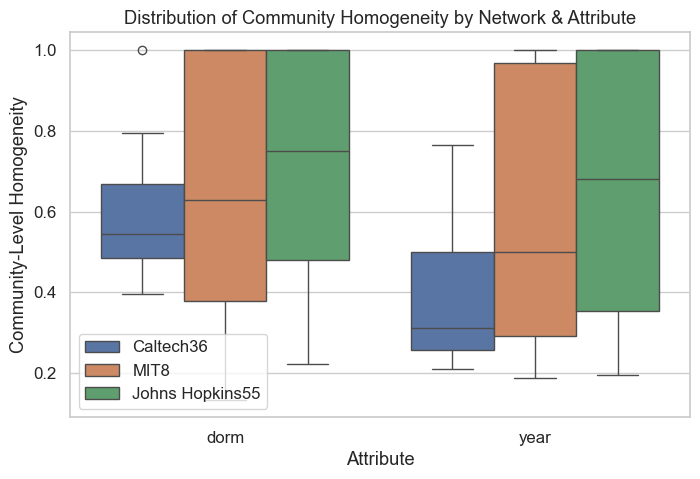

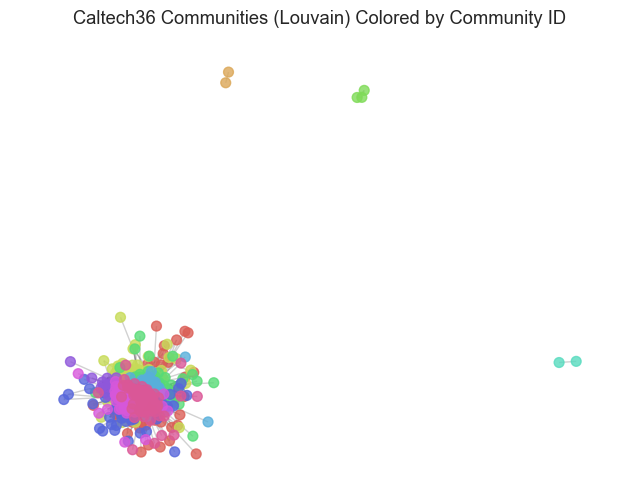

In [47]:
# 1) Analyze Communities
def analyze_communities(G, attribute_map, attribute_name):
    """
    Analyze community structure in relation to node attributes.
    
    Parameters:
    - G: NetworkX graph
    - attribute_map: dict node -> attribute value
    - attribute_name: str, the name of the attribute being analyzed
    
    Returns:
    dict with the following keys:
        'num_communities': int
        'avg_homogeneity': float
        'modularity': float
        'attribute_assortativity': float
        'community_sizes': list[int]         # size of each community
        'community_homogeneity_list': list[float]  # homogeneity of each community
    """
    # Detect communities using Louvain method
    communities = nx.community.louvain_communities(G)
    
    # Create a mapping of nodes to their community
    node_to_community = {}
    for i, community in enumerate(communities):
        for node in community:
            node_to_community[node] = i
    
    # Calculate homogeneity within communities
    from collections import Counter
    
    community_homogeneity = []
    community_sizes = []
    
    for community in communities:
        community_sizes.append(len(community))
        
        # Gather attribute values for nodes in this community
        community_attrs = [
            attribute_map.get(str(node)) 
            for node in community 
            if str(node) in attribute_map
        ]
        
        if community_attrs:
            # Fraction of the most common attribute
            most_common_count = Counter(community_attrs).most_common(1)[0][1]
            homogeneity_val = most_common_count / len(community_attrs)
            community_homogeneity.append(homogeneity_val)
    
    # Calculate average homogeneity (over all communities)
    avg_homogeneity = np.mean(community_homogeneity) if community_homogeneity else 0
    
    # Calculate modularity
    modularity = nx.community.modularity(G, communities)
    
    
    for node in G.nodes():
        G.nodes[node][attribute_name] = attribute_map.get(str(node), None)
    
    attribute_assortativity = nx.attribute_assortativity_coefficient(G, attribute_name)
    
    return {
        'num_communities': len(communities),
        'avg_homogeneity': avg_homogeneity,
        'modularity': modularity,
        'attribute_assortativity': attribute_assortativity,
        'community_sizes': community_sizes,
        'community_homogeneity_list': community_homogeneity,
    }

# 2) Main Analysis

data_dir = "data/"
networks = ["Caltech36", "MIT8", "Johns Hopkins55"]
attributes = ["dorm", "major", "year"]

results = {}  # results[network][attribute] = metrics dict

for network_name in networks:
    gml_file = os.path.join(data_dir, f"{network_name}.gml")
    G = load_fb100_graph(gml_file)
    
    results[network_name] = {}
    
    for attr in attributes:
        # Extract the node->attribute mapping from the graph
        attr_map = nx.get_node_attributes(G, attr)
        
        # Only analyze if attribute is present for at least some nodes
        if len(attr_map) > 0:
            metrics = analyze_communities(G, attr_map, attr)
            results[network_name][attr] = metrics


# 3) Print Out the Results

for network_name in results:
    print(f"\n== Results for {network_name} ==")
    for attr, metrics in results[network_name].items():
        print(f"\nAttribute: {attr}")
        print(f"  Number of communities: {metrics['num_communities']}")
        print(f"  Average homogeneity:  {metrics['avg_homogeneity']:.3f}")
        print(f"  Modularity:           {metrics['modularity']:.3f}")
        print(f"  Assortativity:        {metrics['attribute_assortativity']:.3f}")


# 4) Visualization


# 5.1 Create a summary dataframe for a bar chart
import pandas as pd

rows = []
for network_name in results:
    for attr, metrics in results[network_name].items():
        rows.append({
            'Network': network_name,
            'Attribute': attr,
            'NumCommunities': metrics['num_communities'],
            'AvgHomogeneity': metrics['avg_homogeneity'],
            'Modularity': metrics['modularity'],
            'Assortativity': metrics['attribute_assortativity']
        })

df = pd.DataFrame(rows)

# 5.2 Bar Plot of Metrics by (Network, Attribute)


sns.set(style="whitegrid", font_scale=1.1)

# Melt the dataframe to have one "Metric" column
melted = df.melt(
    id_vars=["Network", "Attribute"],
    value_vars=["AvgHomogeneity", "Modularity", "Assortativity"],
    var_name="Metric",
    value_name="Value"
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=melted,
    x="Attribute",
    y="Value",
    hue="Metric",
    palette="Set2"
)
plt.title("Community Analysis Metrics by Network and Attribute (All Networks Combined)")
plt.xlabel("Attribute")
plt.ylabel("Metric Value")
plt.legend(loc="upper right")
plt.show()


g = sns.catplot(
    data=melted,
    x="Attribute", y="Value", hue="Metric",
    col="Network", col_wrap=3,
    kind="bar", sharey=False, palette="Set2"
)
g.fig.suptitle("Community Metrics by Network & Attribute", y=1.03)
plt.show()

# 5.3 Distribution of Community Homogeneity for each (Network, Attribute)


all_hom_rows = []
for network_name in results:
    for attr, metrics in results[network_name].items():
        for hval in metrics['community_homogeneity_list']:
            all_hom_rows.append({
                'Network': network_name,
                'Attribute': attr,
                'Homogeneity': hval
            })

df_hom = pd.DataFrame(all_hom_rows)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_hom,
    x="Attribute", y="Homogeneity",
    hue="Network"
)
plt.title("Distribution of Community Homogeneity by Network & Attribute")
plt.ylabel("Community-Level Homogeneity")
plt.legend(loc="best")
plt.show()


# 6) Optional: Visualize the Network by Community

def visualize_communities(G, node_to_community, title="Communities"):
    """
    Draw a spring_layout of the network, coloring by community.
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Group nodes by community
    communities = {}
    for node, c_id in node_to_community.items():
        if c_id not in communities:
            communities[c_id] = []
        communities[c_id].append(node)
    
    # Create a color map
    color_map = {}
    unique_comms = sorted(communities.keys())
    colors = sns.color_palette("hls", len(unique_comms))  # distinct colors
    for c_id, color in zip(unique_comms, colors):
        color_map[c_id] = color
    
    # Draw each community
    for c_id, nodes_list in communities.items():
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=nodes_list,
            node_color=[color_map[c_id]] * len(nodes_list),
            node_size=50,
            alpha=0.8
        )
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Example usage (just for Caltech36 dorm communities):
caltech_file = os.path.join(data_dir, "Caltech36.gml")
G_caltech = load_fb100_graph(caltech_file)
attr_map_dorm = nx.get_node_attributes(G_caltech, "dorm")
if attr_map_dorm:
    # detect communities
    csets = nx.community.louvain_communities(G_caltech)
    node_to_community = {}
    for i, cset in enumerate(csets):
        for node in cset:
            node_to_community[node] = i
    
    visualize_communities(
        G_caltech, 
        node_to_community,
        title="Caltech36 Communities (Louvain) Colored by Community ID"
    )


---
# **Interpretation:**

- **Caltech:** Dorm-based homogeneity (0.659) is nearly double that of year (0.328), indicating dorm plays a strong role in community formation.
- **MIT:** Year assortativity (0.310) surpasses dorm (0.179), suggesting year is more influential in community formation.
- **Johns Hopkins:** Dorm and year homogeneity are comparable, but year assortativity (0.377) is notably higher, indicating a greater influence on edge formation.

**Reconciliation of Label Propagation vs. Community Detection:**

- Label propagation accuracy for dorm is low due to the large number of categories, despite moderate community homogeneity.
- Year may exhibit higher assortativity, particularly in near-binary scenarios (e.g., undergrad vs. grad).
- Gender prediction is easier due to its binary nature, often achieving higher accuracy.

**Concluding Remarks:**

1. **Network Properties:** All networks exhibit small-world characteristics with moderate-to-high clustering and low density.
2. **Assortativity:**
   - Year shows moderate to high assortativity, especially in schools with strong class-cohort identity.
   - Dorm influence varies based on housing structure.
   - Gender is weakly assortative but can impact prediction accuracy.
3. **Label Propagation:**
   - Predicting dorm is challenging due to numerous categories.
   - Gender typically yields higher accuracy due to fewer classes.
   - Incomplete major data may necessitate label synthesis or omission.
4. **Community Detection:**
   - Caltech communities are strongly grouped by dorm (homogeneity ~0.66).
   - MIT communities are more influenced by year.
   - Johns Hopkins communities exhibit moderate year assortativity.

**Final Takeaways:**

- The dominance of dorm, major, or year varies by University.
- Methodological considerations are crucial in interpreting results.
- Attribute category distribution, missing data, and network structure should be carefully evaluated before drawing conclusions.


***
***
**On n'est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/) - [pytorch](https://pytorch.org/docs/stable/index.html)